# 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

Our p(x) is:
$$ \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $$

since it integrates to 1 from 0 to $\infty$, being a Gaussian centered on 0. 
Our integral then becomes:


$$ \sqrt{2\pi}\sigma \cdot \int_0^\infty x^3 \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1226.5200875354985 	 1250


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

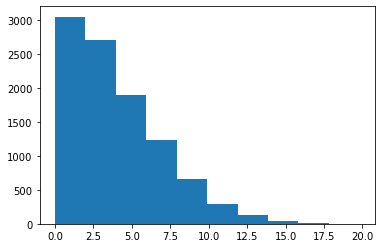

In [6]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

#increasing the value of samples increses our precision
sample_n = 10000

mean = 0
sigma = 5

#sampling the gaussian distribution but taking only positive values
xi = np.absolute(np.random.normal (mean, sigma, sample_n))

#printing our sample values: it's half a gaussian!
gaus_hist, gaus_hist_ax = plt.subplots()
gaus_hist_ax.hist(xi)

def fun(x):
    return np.power(x, 3)

#multiplying our results by the normalization
integral = (np.sqrt(2 * np.pi) * sigma) * np.mean(fun(xi)) * 0.5

#the theoretical value
theor_integral = 2 * np.power(sigma, 4)

print(integral, "\t", theor_integral)

#doing it again but changing sample_n

sample_n = 10

x_i = []
integral_i = []

#need to fix it as increasing the size of xi in a for bugs the compilation
for i in range(5):
    sample_n_i = sample_n * np.power(10, i+1)
    
    x_i.append( np.random.normal (mean, sigma, sample_n - len(x_i)))
    #multiplying our results by the normalization
    for i in (sample)
    integral_i.append(np.sqrt(2 * np.pi) * sigma) * np.mean(fun(x_i)) * 0.5

    #the theoretical value
    theor_integral = 2 * np.power(sigma, 4)

    print(integral, "\t", theor_integral)    
